| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| incomeperperson|	2010 Gross Domestic Product per capita in constant 2000 US$.|
| alcconsumption|	2008 alcohol consumption per adult (age 15+), litres|
| armedforcesrate|	Armed forces personnel (% of total labor force)|
| breastcancerper100TH|	2002 breast cancer new cases per 100,000 female|
| co2emissions|	2006 cumulative CO2 emission (metric tons)|
| femaleemployrate|	2007 female employees age 15+ (% of population)|
| employrate|	2007 total employees age 15+ (% of population)|
| HIVrate|	2009 estimated HIV Prevalence %|
| Internetuserate|	2010 Internet users (per 100 people)|
| lifeexpectancy|	2011 life expectancy at birth (years)|
| oilperperson|	2010 oil Consumption per capita (tonnes per year and person)|
| polityscore|	2009 Democracy score (Polity)|
| relectricperperson|	2008 residential electricity consumption, per person (kWh)|
| suicideper100TH|	2005 Suicide, age adjusted, per 100 000|
| urbanrate|	2008 urban population (% of total)|

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import datetime
# from datetime import datetime, timedelta
# import scipy.stats
# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

import feature_engine
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("gapminderfinal.csv")

In [3]:
df

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,8740.965895,0.030000,0.570000,26.80000,7.594400e+07,25.600000,1.935442,3.65,48.670000,1.484603,0.000000,1173.179044,6.680000,55.700000,24.04
1,Albania,1915.000000,7.290000,1.020000,57.40000,2.237473e+08,42.100000,1.935442,44.99,76.920000,1.484603,9.000000,636.340000,7.700000,51.400000,46.72
2,Algeria,2231.990000,0.690000,2.310000,23.50000,2.932109e+09,31.700000,0.100000,12.50,73.130000,0.420000,2.000000,590.510000,4.850000,50.500000,65.22
3,Andorra,21943.340000,10.170000,1.443963,37.40289,5.033262e+09,47.549438,1.935442,81.00,69.753979,1.484603,3.689441,1173.179044,5.360000,58.635955,88.92
4,Angola,1381.000000,5.570000,1.460000,23.10000,2.483580e+08,69.400000,2.000000,10.00,51.090000,1.484603,-2.000000,173.000000,14.550000,75.700000,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,722.810000,3.910000,1.090000,16.20000,1.425435e+09,67.600000,0.400000,27.85,75.180000,1.484603,-7.000000,302.730000,11.650000,71.000000,27.84
209,West Bank and Gaza,8740.965895,6.689412,5.940000,37.40289,1.424133e+07,11.300000,1.935442,36.42,72.830000,1.484603,3.689441,1173.179044,9.640419,32.000000,71.90
210,"Yemen, Rep.",610.360000,0.200000,2.320000,35.10000,2.348647e+08,20.300000,1.935442,12.35,65.490000,1.484603,-2.000000,130.060000,6.270000,39.000000,30.64
211,Zambia,432.230000,3.560000,0.340000,13.00000,1.320257e+08,53.500000,13.500000,10.12,49.030000,1.484603,7.000000,168.620000,12.020000,61.000000,35.42


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       213 non-null    float64
 2   alcconsumption        213 non-null    float64
 3   armedforcesrate       213 non-null    float64
 4   breastcancerper100th  213 non-null    float64
 5   co2emissions          213 non-null    float64
 6   femaleemployrate      213 non-null    float64
 7   hivrate               213 non-null    float64
 8   internetuserate       213 non-null    float64
 9   lifeexpectancy        213 non-null    float64
 10  oilperperson          213 non-null    float64
 11  polityscore           213 non-null    float64
 12  relectricperperson    213 non-null    float64
 13  suicideper100th       213 non-null    float64
 14  employrate            213 non-null    float64
 15  urbanrate             2

In [5]:
df.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,8740.965895,6.689412,1.443963,37.402890,5.033262e+09,47.549438,1.935442,35.632760,69.753979,1.484603,3.689441,1173.179044,9.640419,58.635955,56.769360
std,13466.912542,4.589345,1.498691,20.444759,2.493649e+10,13.364005,3.632101,26.368642,9.191003,0.987114,5.486034,1341.777091,5.963944,9.611959,23.275759
min,103.780000,0.030000,0.000000,3.900000,1.320000e+05,11.300000,0.060000,0.210000,47.790000,0.030000,-10.000000,0.000000,0.200000,32.000000,10.400000
25%,952.830000,3.230000,0.570000,23.100000,3.795000e+07,40.300000,0.200000,11.500000,65.490000,1.484603,1.000000,431.630000,5.630000,53.500000,37.340000
50%,3665.350000,6.689412,1.210000,35.000000,2.348647e+08,47.549438,1.200000,35.632760,72.230000,1.484603,3.689441,1173.179044,9.510000,58.635955,56.769360
75%,8740.965895,9.500000,1.443963,44.300000,2.421918e+09,53.600000,1.935442,51.960000,76.070000,1.484603,8.000000,1173.179044,11.980000,63.700000,73.500000
max,105147.440000,23.010000,10.640000,101.100000,3.342209e+11,83.300000,25.900000,95.640000,83.390000,12.230000,10.000000,11154.760000,35.750000,83.200000,100.000000


In [6]:
df.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'], dtype='object')

## Data Visualization

### Univariate Data Exploration

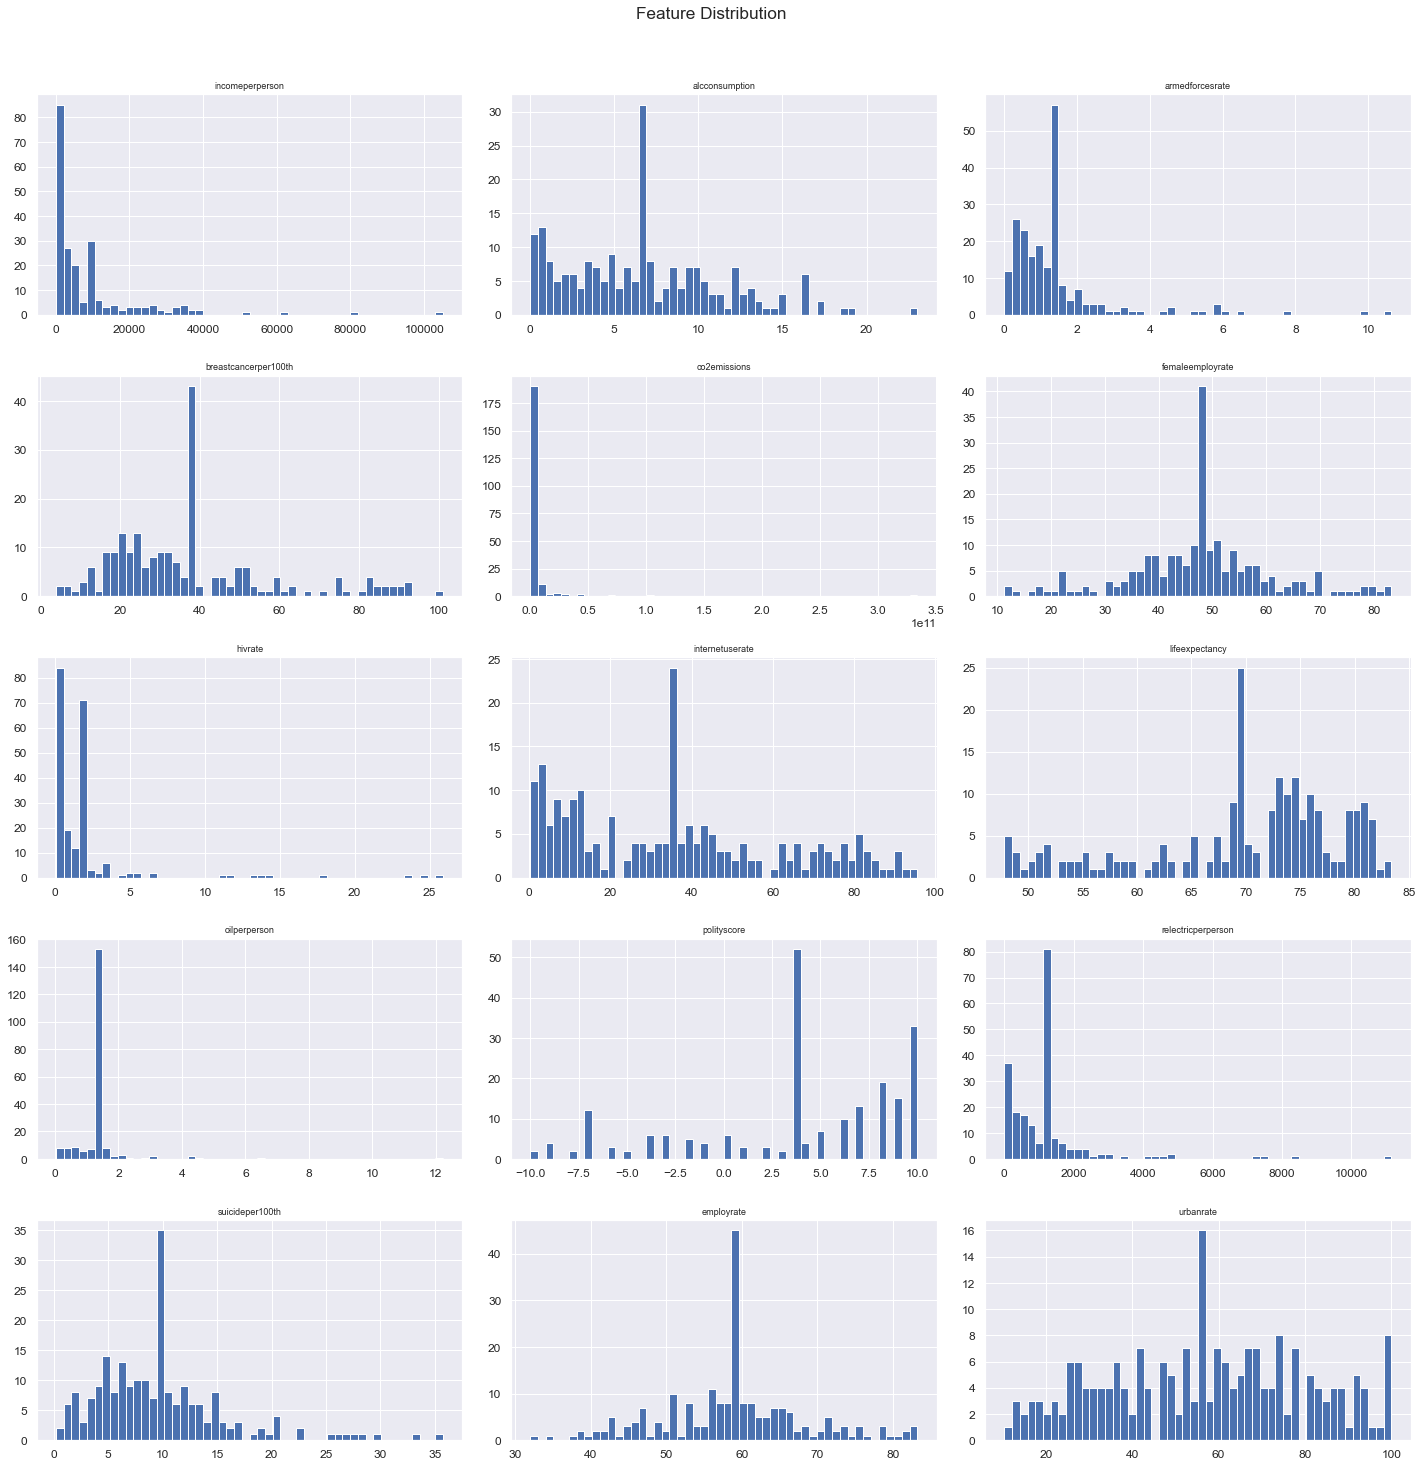

In [7]:
df.hist(bins=50, figsize=(20,20), layout=(5,3))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

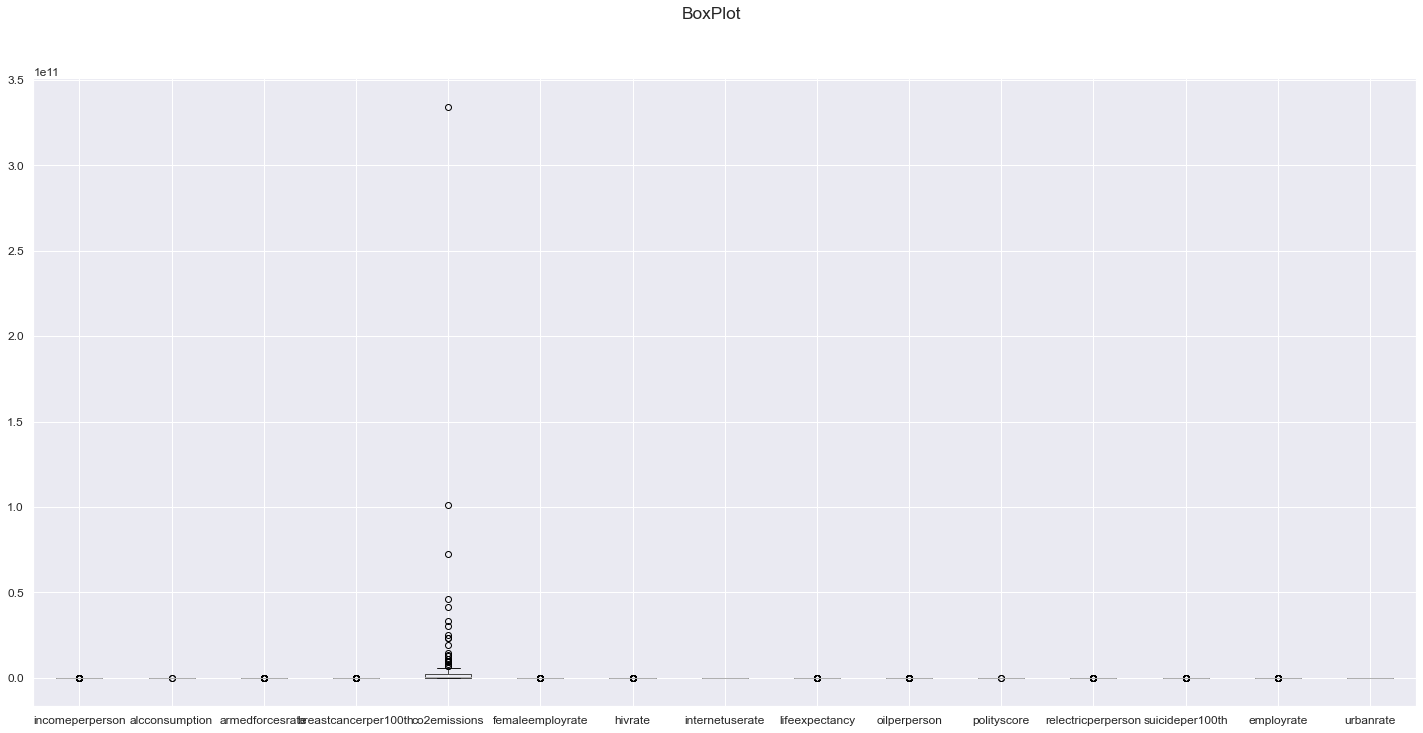

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

## Data Preprocessing

### Drop unwanted features

In [9]:
df.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'], dtype='object')

In [10]:
df.drop(["country"], axis=1, inplace=True)

In [11]:
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,8740.965895,0.03,0.570000,26.80000,7.594400e+07,25.600000,1.935442,3.65,48.670000,1.484603,0.000000,1173.179044,6.68,55.700000,24.04
1,1915.000000,7.29,1.020000,57.40000,2.237473e+08,42.100000,1.935442,44.99,76.920000,1.484603,9.000000,636.340000,7.70,51.400000,46.72
2,2231.990000,0.69,2.310000,23.50000,2.932109e+09,31.700000,0.100000,12.50,73.130000,0.420000,2.000000,590.510000,4.85,50.500000,65.22
3,21943.340000,10.17,1.443963,37.40289,5.033262e+09,47.549438,1.935442,81.00,69.753979,1.484603,3.689441,1173.179044,5.36,58.635955,88.92
4,1381.000000,5.57,1.460000,23.10000,2.483580e+08,69.400000,2.000000,10.00,51.090000,1.484603,-2.000000,173.000000,14.55,75.700000,56.70


### Treat Missing Values

In [12]:
df.isnull().sum()

incomeperperson         0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 0
internetuserate         0
lifeexpectancy          0
oilperperson            0
polityscore             0
relectricperperson      0
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64

### Replacing values

In [13]:
#df.replace()

### Rounding Values

In [14]:
###pandas.DataFrame.round

df.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'], dtype='object')

In [15]:
df[['incomeperperson', 'alcconsumption', 'armedforcesrate']] = df[['incomeperperson', 'alcconsumption', 'armedforcesrate']].round(decimals=2)

In [16]:
df[['femaleemployrate', 'hivrate', 'employrate']] = df[['femaleemployrate', 'hivrate', 'employrate']].round(decimals=2)

In [17]:
df[['oilperperson', 'relectricperperson']] = df[['oilperperson', 'relectricperperson']].round(decimals=2)

In [18]:
df[['breastcancerper100th', 'lifeexpectancy', 'polityscore','suicideper100th']] = df[['breastcancerper100th', 'lifeexpectancy', 'polityscore','suicideper100th']].round(decimals=0)

In [19]:
df["co2emissions"] = (df["co2emissions"]/1000000).round(decimals=0)

In [20]:
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

In [21]:
df[['urbanrate']] = df[['urbanrate']].round(decimals=2)

In [22]:
df

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,8740.97,0.03,0.57,27.0,76.0,25.60,1.94,4.0,49.0,1.48,0.0,1173.18,7.0,55.70,24.04
1,1915.00,7.29,1.02,57.0,224.0,42.10,1.94,45.0,77.0,1.48,9.0,636.34,8.0,51.40,46.72
2,2231.99,0.69,2.31,24.0,2932.0,31.70,0.10,12.0,73.0,0.42,2.0,590.51,5.0,50.50,65.22
3,21943.34,10.17,1.44,37.0,5033.0,47.55,1.94,81.0,70.0,1.48,4.0,1173.18,5.0,58.64,88.92
4,1381.00,5.57,1.46,23.0,248.0,69.40,2.00,10.0,51.0,1.48,-2.0,173.00,15.0,75.70,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16.0,1425.0,67.60,0.40,28.0,75.0,1.48,-7.0,302.73,12.0,71.00,27.84
209,8740.97,6.69,5.94,37.0,14.0,11.30,1.94,36.0,73.0,1.48,4.0,1173.18,10.0,32.00,71.90
210,610.36,0.20,2.32,35.0,235.0,20.30,1.94,12.0,65.0,1.48,-2.0,130.06,6.0,39.00,30.64
211,432.23,3.56,0.34,13.0,132.0,53.50,13.50,10.0,49.0,1.48,7.0,168.62,12.0,61.00,35.42


### Treat Duplicate Values

In [23]:
df.duplicated(keep='first').sum()

0

### Type Change

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incomeperperson       213 non-null    float64
 1   alcconsumption        213 non-null    float64
 2   armedforcesrate       213 non-null    float64
 3   breastcancerper100th  213 non-null    float64
 4   co2emissions          213 non-null    float64
 5   femaleemployrate      213 non-null    float64
 6   hivrate               213 non-null    float64
 7   internetuserate       213 non-null    float64
 8   lifeexpectancy        213 non-null    float64
 9   oilperperson          213 non-null    float64
 10  polityscore           213 non-null    float64
 11  relectricperperson    213 non-null    float64
 12  suicideper100th       213 non-null    float64
 13  employrate            213 non-null    float64
 14  urbanrate             213 non-null    float64
dtypes: float64(15)
memory u

In [25]:
df["breastcancerper100th"] = df["breastcancerper100th"].astype('int')

In [26]:
df["internetuserate"] = df["internetuserate"].astype('int')

In [27]:
df["lifeexpectancy"] = df["lifeexpectancy"].astype('int')

In [28]:
df["polityscore"] = df["polityscore"].astype('int')

In [29]:
df["suicideper100th"] = df["suicideper100th"].astype('int')

In [30]:
df

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incomeperperson       213 non-null    float64
 1   alcconsumption        213 non-null    float64
 2   armedforcesrate       213 non-null    float64
 3   breastcancerper100th  213 non-null    int32  
 4   co2emissions          213 non-null    float64
 5   femaleemployrate      213 non-null    float64
 6   hivrate               213 non-null    float64
 7   internetuserate       213 non-null    int32  
 8   lifeexpectancy        213 non-null    int32  
 9   oilperperson          213 non-null    float64
 10  polityscore           213 non-null    int32  
 11  relectricperperson    213 non-null    float64
 12  suicideper100th       213 non-null    int32  
 13  employrate            213 non-null    float64
 14  urbanrate             213 non-null    float64
dtypes: float64(10), int32(5

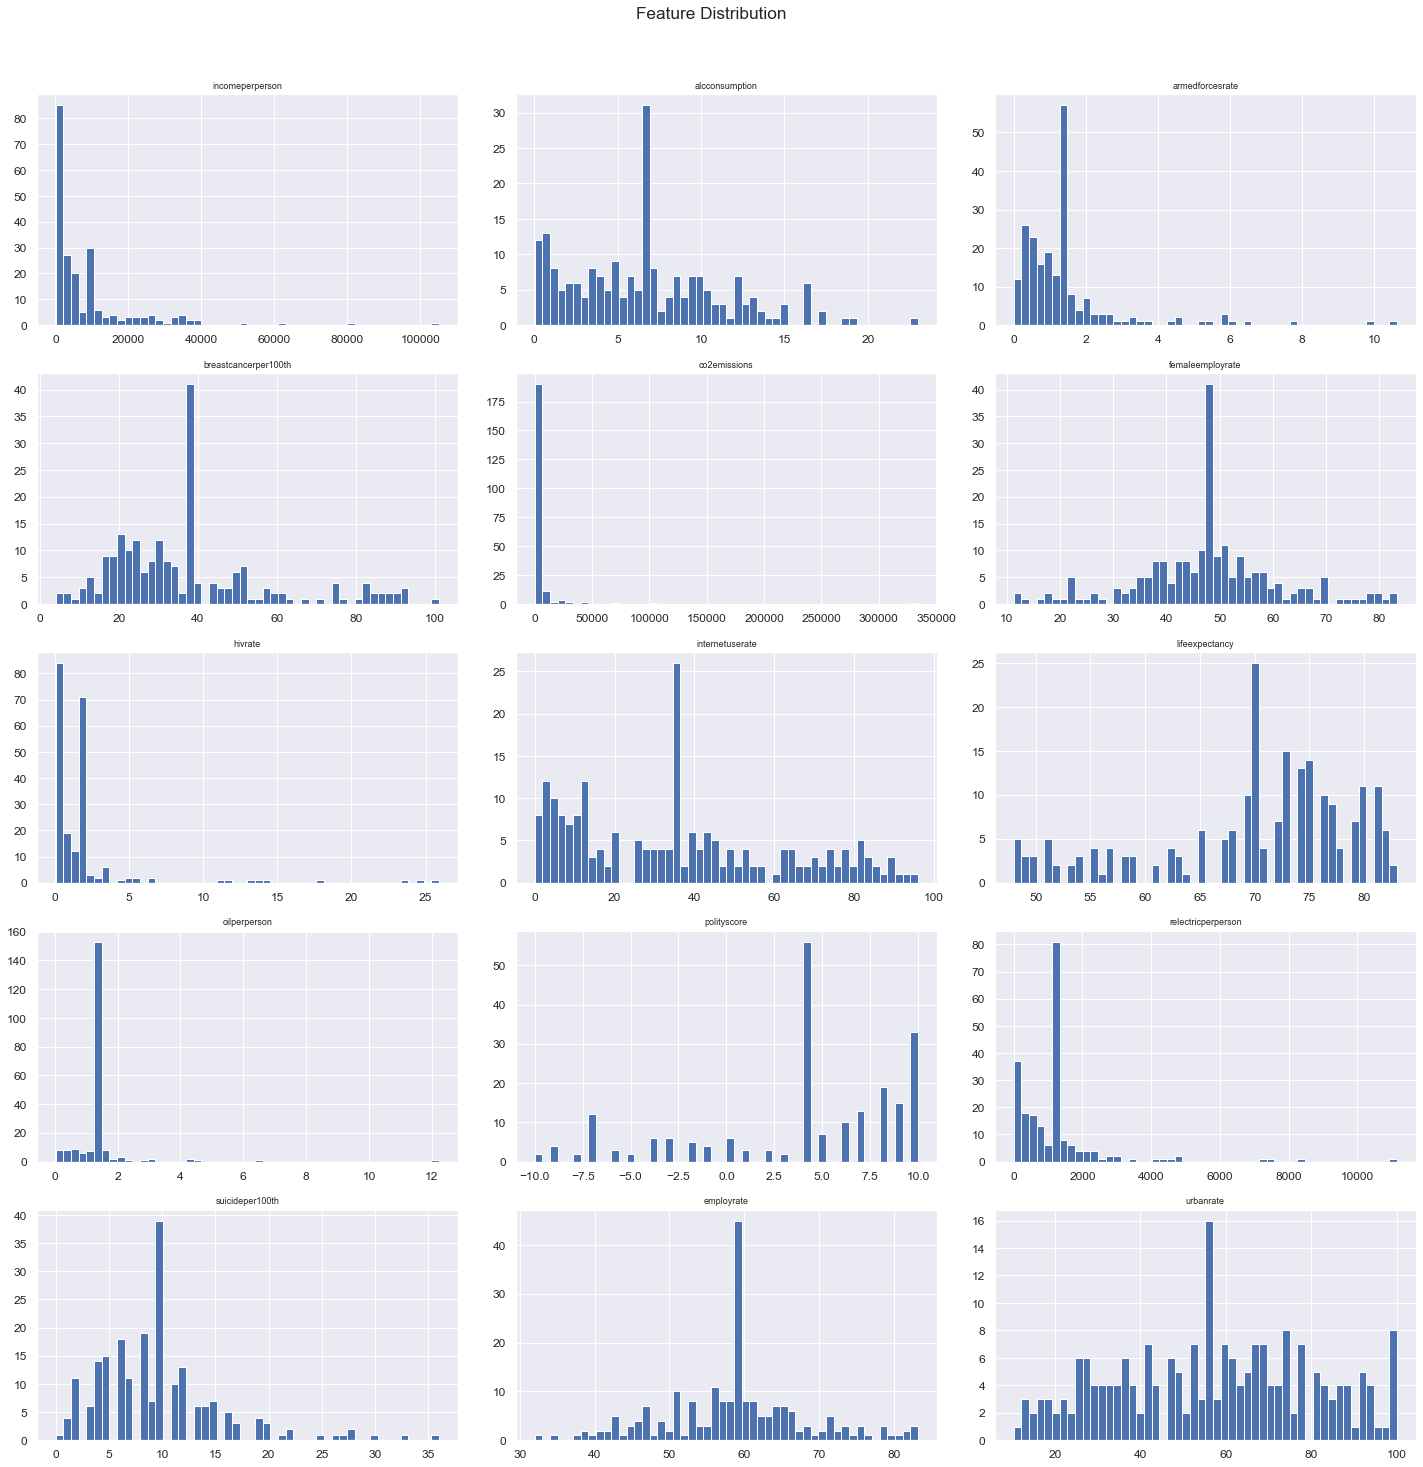

In [32]:
df.hist(bins=50, figsize=(20,20), layout=(5,3))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [33]:
#df.to_csv("gapminderfinal2.csv", index=False)

### Equal Width Discretization

In [34]:
df = pd.read_csv("gapminderfinal2.csv")

In [35]:
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70


In [36]:
df["demoscorecat"] = df["polityscore"] #Make a copy

In [37]:
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,9
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,-2


In [38]:
disc = EqualWidthDiscretiser(bins=4, variables=['demoscorecat'], return_object=True)

In [39]:
disc

EqualWidthDiscretiser(bins=4, return_object=True, variables=['demoscorecat'])

In [40]:
disc.fit(df)

EqualWidthDiscretiser(bins=4, return_object=True, variables=['demoscorecat'])

In [41]:
disc.binner_dict_

{'demoscorecat': [-inf, -5.0, 0.0, 5.0, inf]}

In [42]:
disc.fit_transform(df)

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3


In [43]:
df2 = disc.fit_transform(df)

In [44]:
df2["demoscorecat"].value_counts()

3    90
2    71
1    27
0    25
Name: demoscorecat, dtype: int64

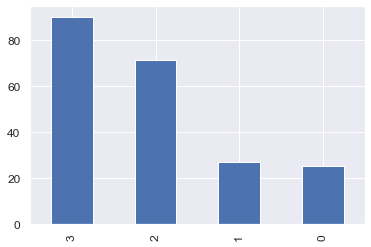

In [45]:
df2["demoscorecat"].value_counts().plot.bar()
plt.show()

In [46]:
df2.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000
mean,8740.966338,6.689484,1.443052,37.323944,5033.244131,47.549531,1.936854,35.685446,69.751174,1.481362,3.765258,1173.179390,9.685446,58.63662,56.769390
std,13466.912542,4.589345,1.498692,20.443277,24936.503422,13.364005,3.632102,26.418255,9.241981,0.987116,5.487663,1341.777091,5.955782,9.61196,23.275759
min,103.780000,0.030000,0.000000,4.000000,0.000000,11.300000,0.060000,0.000000,48.000000,0.030000,-10.000000,0.000000,0.000000,32.00000,10.400000
25%,952.830000,3.230000,0.570000,23.000000,38.000000,40.300000,0.200000,12.000000,65.000000,1.480000,1.000000,431.630000,6.000000,53.50000,37.340000
50%,3665.350000,6.690000,1.210000,35.000000,235.000000,47.550000,1.200000,36.000000,72.000000,1.480000,4.000000,1173.180000,10.000000,58.64000,56.770000
75%,8740.970000,9.500000,1.440000,44.000000,2422.000000,53.600000,1.940000,52.000000,76.000000,1.480000,8.000000,1173.180000,12.000000,63.70000,73.500000
max,105147.440000,23.010000,10.640000,101.000000,334221.000000,83.300000,25.900000,96.000000,83.000000,12.230000,10.000000,11154.760000,36.000000,83.20000,100.000000


### Equal Frequency Discretizer

In [47]:
df2.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1


In [48]:
df2["co2cat"] = df2["co2emissions"] #Make a copy

In [49]:
df2.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,76.0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,224.0
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,2932.0
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,5033.0
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,248.0


In [50]:
disc = EqualFrequencyDiscretiser(q=5, variables=['co2cat'])

In [51]:
disc.fit(df2)

EqualFrequencyDiscretiser(q=5, variables=['co2cat'])

In [52]:
disc.binner_dict_

{'co2cat': [-inf,
  23.400000000000006,
  118.00000000000011,
  542.800000000001,
  4394.400000000004,
  inf]}

In [53]:
df3 = disc.transform(df2)
df3

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2


In [54]:
df3["co2cat"].value_counts()

4    43
2    43
0    43
3    42
1    42
Name: co2cat, dtype: int64

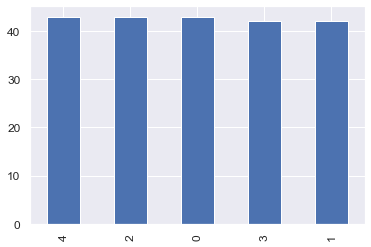

In [55]:
df3["co2cat"].value_counts().plot.bar()
plt.show()

In [56]:
#df3.to_csv("gapminderfinal3.csv", index=False)

### Discretisation  + OrdinalEncoder

In [57]:
df3 = pd.read_csv("gapminderfinal3.csv")

In [58]:
df3.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2


In [59]:
### Choose incomeperperson and alcconsumption to be discretized first

In [60]:
df3["incomecat"] = df3["incomeperperson"] #Make a copy

In [61]:
df3["alccat"] = df3["alcconsumption"] #Make a copy

In [62]:
df3.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,8740.97,0.03
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1915.00,7.29
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2231.99,0.69
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,21943.34,10.17
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1381.00,5.57


In [63]:
df3.describe();

In [64]:
# to encode variables we need them returned as objects for feature-engine
disc = EqualFrequencyDiscretiser(q=5, variables=['incomecat','alccat'], return_object=True)

In [65]:
df4 = disc.fit_transform(df3)
df4.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2


In [66]:
df4["incomecat"].value_counts()

4    43
2    43
0    43
3    42
1    42
Name: incomecat, dtype: int64

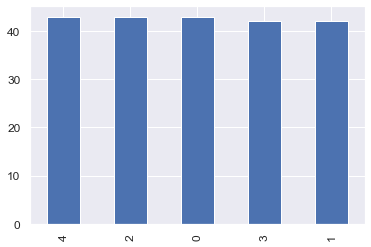

In [67]:
df4["incomecat"].value_counts().plot.bar()
plt.show()

In [68]:
df4["alccat"].value_counts()

2    45
4    43
0    43
1    42
3    40
Name: alccat, dtype: int64

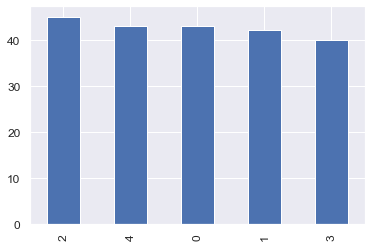

In [69]:
df4["alccat"].value_counts().plot.bar()
plt.show()

In [70]:
df4.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2


In [71]:
#df4.to_csv("gapminderfinal4.csv", index=False)

In [72]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incomeperperson       213 non-null    float64
 1   alcconsumption        213 non-null    float64
 2   armedforcesrate       213 non-null    float64
 3   breastcancerper100th  213 non-null    int64  
 4   co2emissions          213 non-null    float64
 5   femaleemployrate      213 non-null    float64
 6   hivrate               213 non-null    float64
 7   internetuserate       213 non-null    int64  
 8   lifeexpectancy        213 non-null    int64  
 9   oilperperson          213 non-null    float64
 10  polityscore           213 non-null    int64  
 11  relectricperperson    213 non-null    float64
 12  suicideper100th       213 non-null    int64  
 13  employrate            213 non-null    float64
 14  urbanrate             213 non-null    float64
 15  demoscorecat          2

In [73]:
# Let y = demoscorecat, and x = incomecat, alccat (both must be objects)

In [74]:
df5 = df4[['demoscorecat','incomecat', 'alccat']]

In [75]:
df5.head()

,demoscorecat,incomecat,alccat
0,1,3,0
1,3,1,3
2,2,2,0
3,2,4,4
4,1,1,2


In [76]:
df5.dtypes

demoscorecat     int64
incomecat       object
alccat          object
dtype: object

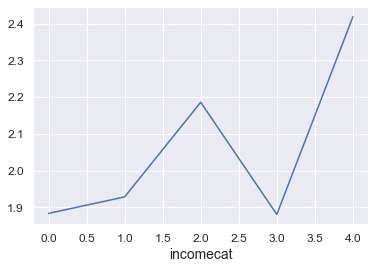

In [77]:
df5.groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

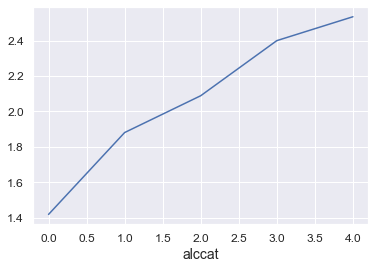

In [78]:
df5.groupby('alccat')['demoscorecat'].mean().plot()
plt.show()

In [79]:
enc = OrdinalEncoder(encoding_method = 'ordered')

In [80]:
X = df5[['incomecat', 'alccat']]

In [81]:
y = df5['demoscorecat']

In [82]:
enc.fit(X, y)

OrdinalEncoder(variables=['incomecat', 'alccat'])

In [83]:
X_transform = enc.transform(X)

In [84]:
enc.encoder_dict_

{'incomecat': {3: 0, 0: 1, 1: 2, 2: 3, 4: 4},
 'alccat': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}}

In [85]:
X_transform  # Transformed for monotonic relationship

,incomecat,alccat
0,0,0
1,2,3
2,3,0
3,4,4
4,2,2
...,...,...
208,2,1
209,0,2
210,1,0
211,1,1


In [86]:
y

0      1
1      3
2      2
3      2
4      1
      ..
208    0
209    2
210    1
211    3
212    2
Name: demoscorecat, Length: 213, dtype: int64

In [87]:
pd.concat([X_transform, y], axis=1)

,incomecat,alccat,demoscorecat
0,0,0,1
1,2,3,3
2,3,0,2
3,4,4,2
4,2,2,1
...,...,...,...
208,2,1,0
209,0,2,2
210,1,0,1
211,1,1,3


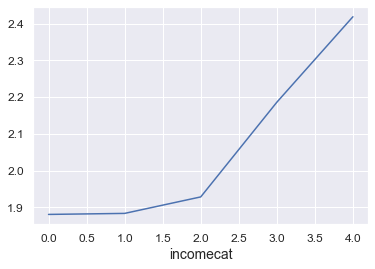

In [88]:
pd.concat([X_transform, y], axis=1).groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

### Discretisation with Decision Trees using Feature-Engine

In [89]:
df4 = pd.read_csv("gapminderfinal4.csv")

In [90]:
df4.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2


In [91]:
df4['electricat'] = df4['relectricperperson']

In [92]:
df4.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,1173.18
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,636.34
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,590.51
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,1173.18
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,173.00


In [93]:
# Let y = demoscorecat, and x = electricat, breastcancerper100th

df6 = df4[['breastcancerper100th','electricat','demoscorecat']]
df6.head()

,breastcancerper100th,electricat,demoscorecat
0,27,1173.18,1
1,57,636.34,3
2,24,590.51,2
3,37,1173.18,2
4,23,173.00,1


In [94]:
X = df6[['breastcancerper100th','electricat']]
y = df6['demoscorecat']

In [95]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=5, scoring='accuracy', variables=['electricat'], regression=False,
                                  param_grid={'max_depth':[1,2,3], 'min_samples_leaf':[2,4,6]})

In [96]:
treeDisc.fit(X,y)

DecisionTreeDiscretiser(cv=5,
                        param_grid={'max_depth': [1, 2, 3],
                                    'min_samples_leaf': [2, 4, 6]},
                        regression=False, scoring='accuracy',
                        variables=['electricat'])

In [97]:
treeDisc.binner_dict_['electricat'].best_params_

{'max_depth': 3, 'min_samples_leaf': 4}

In [98]:
treeDisc.scores_dict_['electricat']

0.6056338028169014

In [99]:
X_transform = treeDisc.transform(X) #Only electricat column

In [100]:
X_transform

,breastcancerper100th,electricat
0,27,0.155844
1,57,0.101449
2,24,0.101449
3,37,0.155844
4,23,0.101449
...,...,...
208,16,0.101449
209,37,0.155844
210,35,0.101449
211,13,0.101449


In [101]:
X_transform.electricat.unique()

array([0.15584416, 0.10144928, 0.03333333, 0.        , 0.29166667])

In [102]:
# monotonic relationship with target: train set

pd.concat([X_transform, y],axis=1)

,breastcancerper100th,electricat,demoscorecat
0,27,0.155844,1
1,57,0.101449,3
2,24,0.101449,2
3,37,0.155844,2
4,23,0.101449,1
...,...,...,...
208,16,0.101449,0
209,37,0.155844,2
210,35,0.101449,1
211,13,0.101449,3


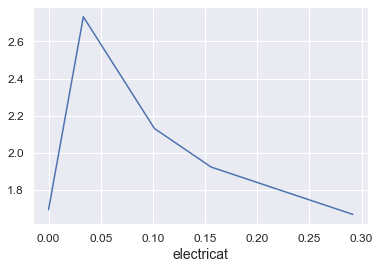

In [103]:
pd.concat([X_transform, y],axis=1).groupby('electricat')['demoscorecat'].mean().plot()
plt.show()

In [104]:
t1 = pd.concat([X_transform, y],axis=1).groupby('electricat').count()
t1

,breastcancerper100th,demoscorecat
electricat,,
0.000000,13,13
0.033333,30,30
0.101449,69,69
0.155844,77,77
0.291667,24,24


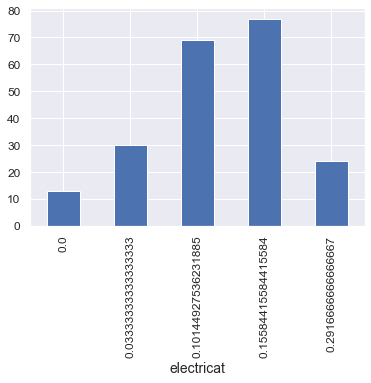

In [105]:
# let's explore how many observations we have per bin
t1['demoscorecat'].plot.bar()
plt.show()

In [106]:
t2 = pd.concat([X_transform, y],axis=1)

In [107]:
df4.shape, t2.shape

((213, 20), (213, 3))

In [108]:
df4.drop('electricat', axis=1, inplace=True)
df4.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2


In [109]:
t2 = t2[["electricat"]]
t2.head()

,electricat
0,0.155844
1,0.101449
2,0.101449
3,0.155844
4,0.101449


In [110]:
df7 = pd.concat([df4, t2],axis=1)

In [111]:
df7

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449


In [112]:
#df7.to_csv("gapminderfinal5.csv", index=False)